In [12]:
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from tensorflow.keras.losses import *
from tensorflow.keras.regularizers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.datasets import *
from tensorflow.keras.preprocessing.image import *
import sklearn
import pandas as pd

# Saving models

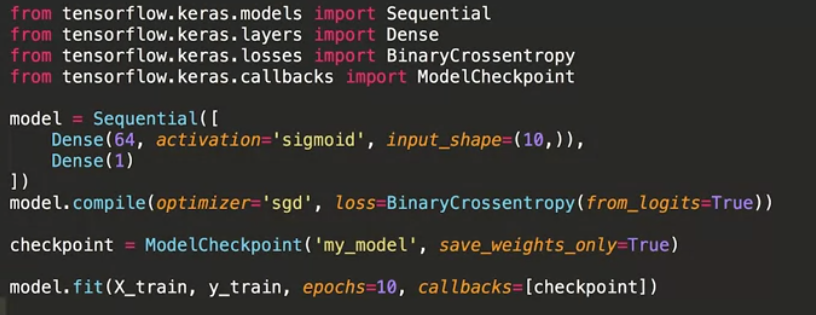

In [3]:
Image.open(r'C:\Users\44788/Desktop\it3.png')

using a built in callback called ModelCheckpoint.

in the compile method, the loss is an instationation of a BInaryCrossentropy object, and fed in from logits=True.

therefore, this model is a binary classifier. and the linear unit output will be squeezed through the loss fucntion specified in the compile method.

ModelCheckpoint only has one required argument, this is the filepath as to where we want the model to be saved. however, in this instance the optional argument - save weights only is set to be True.

in this example the saved weights get overwritten on every epoch.

you can also specify the hdf file format. 'model.h5'.

# Loading models

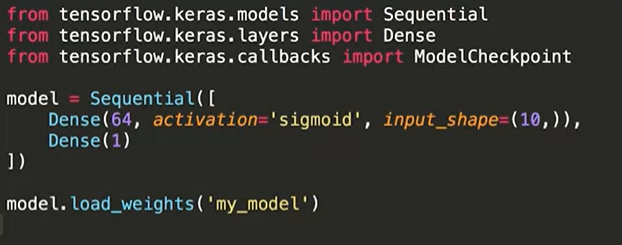

In [5]:
Image.open(r'C:\Users\44788/Desktop\it4.png')

need to use the same model as before to rebuild it

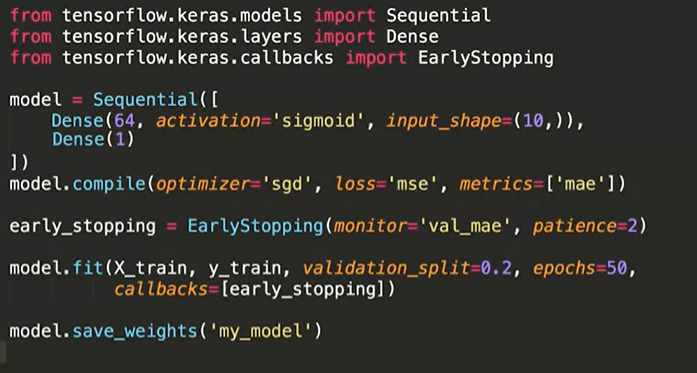

In [6]:
Image.open(r'C:\Users\44788/Desktop\it6.png')

this is a way of manually saving weights.

today we use the CIFAR data set. it contains 60,000 images, each with one of 10 labels

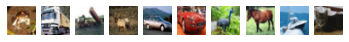

In [32]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train/255
x_test = x_test/255
x_train = x_train[:10000]
y_train = y_train[:10000]
x_test = x_test[:1000]
y_test = y_test[:1000]

fig, ax = plt.subplots(1, 10)
for i in range(10):
    ax[i].set_axis_off()
    ax[i].imshow(x_train[i])

In [3]:
def get_test_accuracy(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x=x_test, y=y_test, verbose=0)
    print('accuracy: {acc:0.3f}'.format(acc=test_acc))

In [4]:
def get_new_model():
    model = Sequential([
        Conv2D(16, (3,3), activation='relu', input_shape=(32,32,3), name='conv1'),
        Conv2D(8, (3,3), activation='relu', name='conv2'),
        MaxPooling2D((4,4), name='pool1'),
        Flatten(name='flatten'),
        Dense(32, activation='relu', name='dense1'),
        Dense(10, activation='sigmoid', name='dense2')
    ])
    model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model

In [5]:
model = get_new_model()

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 30, 30, 16)        448       
_________________________________________________________________
conv2 (Conv2D)               (None, 28, 28, 8)         1160      
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 7, 7, 8)           0         
_________________________________________________________________
flatten (Flatten)            (None, 392)               0         
_________________________________________________________________
dense1 (Dense)               (None, 32)                12576     
_________________________________________________________________
dense2 (Dense)               (None, 10)                330       
Total params: 14,514
Trainable params: 14,514
Non-trainable params: 0
____________________________________________________

In [7]:
get_test_accuracy(model, x_test, y_test)

accuracy: 0.125


In [15]:
checkpoint_path = r'C:\Users\44788\Desktop\coding\pynbs\Tensorflow_specialization\getting_started/checkpoint1.h5'
checkpoint = ModelCheckpoint(filepath = checkpoint_path,
                            frequency='epoch',
                            save_weights_only=True,
                            verbose=1)

In [16]:
model.fit(x=x_train,
         y=y_train,
         epochs=3,
         callbacks=[checkpoint])

Epoch 1/3
313/313 [==============================] - 2s 5ms/step - loss: 1.4350 - accuracy: 0.4830: 0s -

Epoch 00001: saving model to C:\Users\44788\Desktop\coding\pynbs\Tensorflow_specialization\getting_started\checkpoint1.h5
Epoch 2/3
313/313 [==============================] - 2s 5ms/step - loss: 1.3677 - accuracy: 0.5082

Epoch 00002: saving model to C:\Users\44788\Desktop\coding\pynbs\Tensorflow_specialization\getting_started\checkpoint1.h5
Epoch 3/3
313/313 [==============================] - 2s 5ms/step - loss: 1.3256 - accuracy: 0.5247

Epoch 00003: saving model to C:\Users\44788\Desktop\coding\pynbs\Tensorflow_specialization\getting_started\checkpoint1.h5


In [19]:
get_test_accuracy(model, x_test, y_test)

accuracy: 0.482


In [20]:
model2=get_new_model()

In [23]:
model2.load_weights(checkpoint_path)
get_test_accuracy(model2, x_test, y_test)

accuracy: 0.482


# Customizing checkpoints

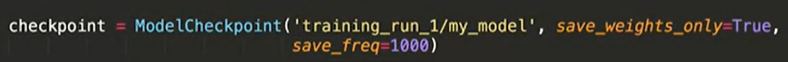

In [24]:
Image.open(r'C:\Users\44788/Desktop\it1.png')

Save_freq can be used as an arguement to specify how often you want to save.

'epoch' - on each epoch end.

interger valaue - sets freq in terms of number of samples the model has seen since last save. 

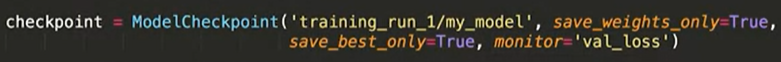

In [25]:
Image.open(r'C:\Users\44788/Desktop\it2.png')

save_best_only is a criteria for saving - only save the model if the metric specified by monitor is better than it was on last save.

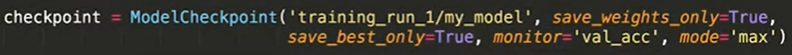

In [27]:
Image.open(r'C:\Users\44788/Desktop\it4.png')

mode - are we minimizing or maximising 

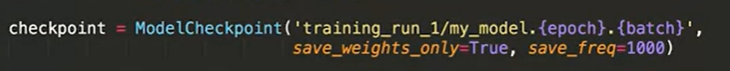

In [28]:
Image.open(r'C:\Users\44788/Desktop\it5.png')

have the save file include the epoch and batch number. no overwriting 

In [34]:
checkpoint_path2 = r'C:\Users\44788\Desktop\coding\pynbs\Tensorflow_specialization\getting_started/checkpoint2.h5'
checkpoint2 = ModelCheckpoint(filepath = checkpoint_path2,
                            frequency=5000,
                            save_weights_only=True,
                            verbose=1)

In [35]:
model2.fit(x=x_train,
         y=y_train,
         epochs=3,
         batch_size=10,
         validation_data=(x_test, y_test),
         callbacks=[checkpoint2])

Epoch 1/3
1000/1000 [==============================] - 5s 5ms/step - loss: 1.1144 - accuracy: 0.6035 - val_loss: 1.2613 - val_accuracy: 0.5550

Epoch 00001: saving model to C:\Users\44788\Desktop\coding\pynbs\Tensorflow_specialization\getting_started\checkpoint2.h5
Epoch 2/3
1000/1000 [==============================] - 5s 5ms/step - loss: 1.0817 - accuracy: 0.6209 - val_loss: 1.3199 - val_accuracy: 0.5450

Epoch 00002: saving model to C:\Users\44788\Desktop\coding\pynbs\Tensorflow_specialization\getting_started\checkpoint2.h5
Epoch 3/3
1000/1000 [==============================] - 5s 5ms/step - loss: 1.0574 - accuracy: 0.6299 - val_loss: 1.2696 - val_accuracy: 0.5690

Epoch 00003: saving model to C:\Users\44788\Desktop\coding\pynbs\Tensorflow_specialization\getting_started\checkpoint2.h5


In [43]:
model3 = get_new_model()

In [38]:
checkpoint_path3 = r'C:\Users\44788\Desktop\coding\pynbs\Tensorflow_specialization\getting_started/checkpoint3.h5'
checkpoint3 = ModelCheckpoint(filepath = checkpoint_path3,
                            frequency='epoch',
                            save_weights_only=True,
                            monitor='val_accuracy',
                            save_best_only=True,
                            verbose=1)

In [44]:
history = model3.fit(x=x_train,
         y=y_train,
         epochs=10,
         batch_size=10,
         validation_data=(x_test, y_test),
         callbacks=[checkpoint3],
         verbose=0)


Epoch 00001: val_accuracy did not improve from 0.55900

Epoch 00002: val_accuracy did not improve from 0.55900

Epoch 00003: val_accuracy did not improve from 0.55900

Epoch 00004: val_accuracy did not improve from 0.55900

Epoch 00005: val_accuracy did not improve from 0.55900

Epoch 00006: val_accuracy did not improve from 0.55900

Epoch 00007: val_accuracy did not improve from 0.55900

Epoch 00008: val_accuracy did not improve from 0.55900

Epoch 00009: val_accuracy did not improve from 0.55900

Epoch 00010: val_accuracy improved from 0.55900 to 0.56900, saving model to C:\Users\44788\Desktop\coding\pynbs\Tensorflow_specialization\getting_started\checkpoint3.h5


<AxesSubplot:>

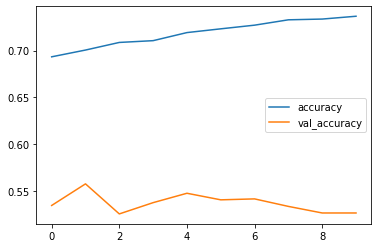

In [42]:
df = pd.DataFrame(history.history)
df.plot(y=['accuracy', 'val_accuracy'])

# saving and loading the whole model

In [45]:
Image.open(r'C:\Users\44788/Desktop\it6.png')

you can save as h5 file!

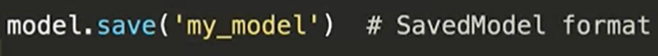

In [47]:
Image.open(r'C:\Users\44788/Desktop\it8.png') # add h5 to file path

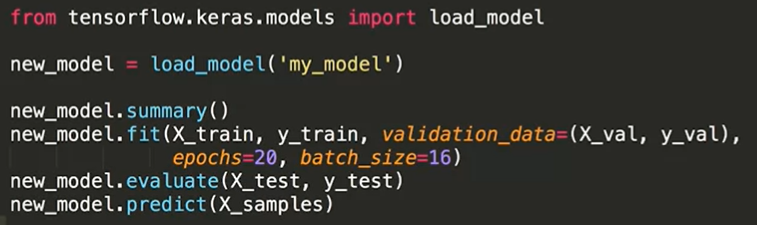

In [48]:
Image.open(r'C:\Users\44788/Desktop\it9.png')


Epoch 00001: val_accuracy improved from -inf to 0.38000, saving model to C:\Users\44788\Desktop\coding\pynbs\Tensorflow_specialization\getting_started\checkpoint4.h5

Epoch 00002: val_accuracy improved from 0.38000 to 0.46900, saving model to C:\Users\44788\Desktop\coding\pynbs\Tensorflow_specialization\getting_started\checkpoint4.h5

Epoch 00003: val_accuracy improved from 0.46900 to 0.50200, saving model to C:\Users\44788\Desktop\coding\pynbs\Tensorflow_specialization\getting_started\checkpoint4.h5

Epoch 00004: val_accuracy improved from 0.50200 to 0.51000, saving model to C:\Users\44788\Desktop\coding\pynbs\Tensorflow_specialization\getting_started\checkpoint4.h5

Epoch 00005: val_accuracy improved from 0.51000 to 0.51900, saving model to C:\Users\44788\Desktop\coding\pynbs\Tensorflow_specialization\getting_started\checkpoint4.h5

Epoch 00006: val_accuracy improved from 0.51900 to 0.54200, saving model to C:\Users\44788\Desktop\coding\pynbs\Tensorflow_specialization\getting_starte

<AxesSubplot:>

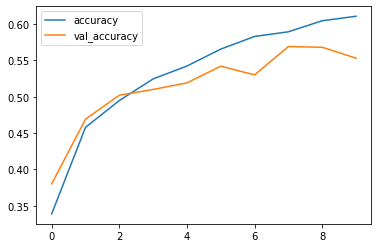

In [50]:
model4 = get_new_model()

checkpoint_path4 = r'C:\Users\44788\Desktop\coding\pynbs\Tensorflow_specialization\getting_started/checkpoint4.h5'
checkpoint4 = ModelCheckpoint(filepath = checkpoint_path4,
                            frequency='epoch',
                            save_weights_only=False,
                            monitor='val_accuracy',
                            save_best_only=True,
                            verbose=1)

history = model4.fit(x=x_train,
         y=y_train,
         epochs=10,
         batch_size=10,
         validation_data=(x_test, y_test),
         callbacks=[checkpoint4],
         verbose=0)

df = pd.DataFrame(history.history)
df.plot(y=['accuracy', 'val_accuracy'])

In [51]:
model5=load_model(checkpoint_path4)
get_test_accuracy(model4, x_test, y_test)
get_test_accuracy(model5, x_test, y_test)

accuracy: 0.553
accuracy: 0.569


# Loading pre-trained Keras models

you can load models directly from keras here:
https://keras.rstudio.com/articles/applications.html

there is documentation to help with each model on how it shoudld be utitlised.

useful params when loading these models:

include_top - generate a headless model so you can modify the input layer. e.g. False, or if youspecify true you can modify the input images(if convol) to fit the input layer.

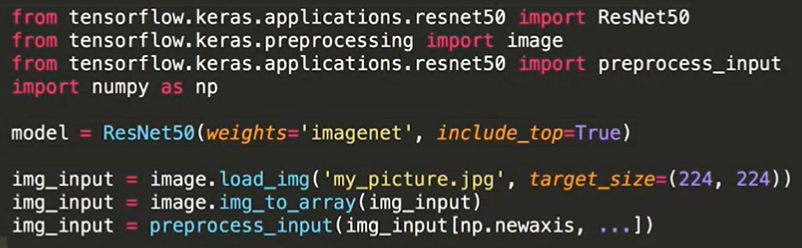

In [53]:
Image.open(r'C:\Users\44788/Desktop\it10.png')

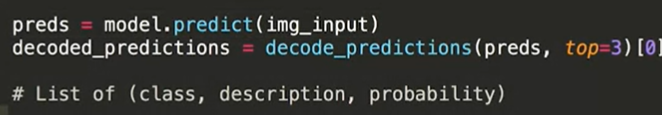

In [54]:
Image.open(r'C:\Users\44788/Desktop\it11.png')

In [14]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions

In [5]:
ResNet = ResNet50(weights='imagenet', include_top=True)

102973440/102967424 [==============================] - 8s 0us/step


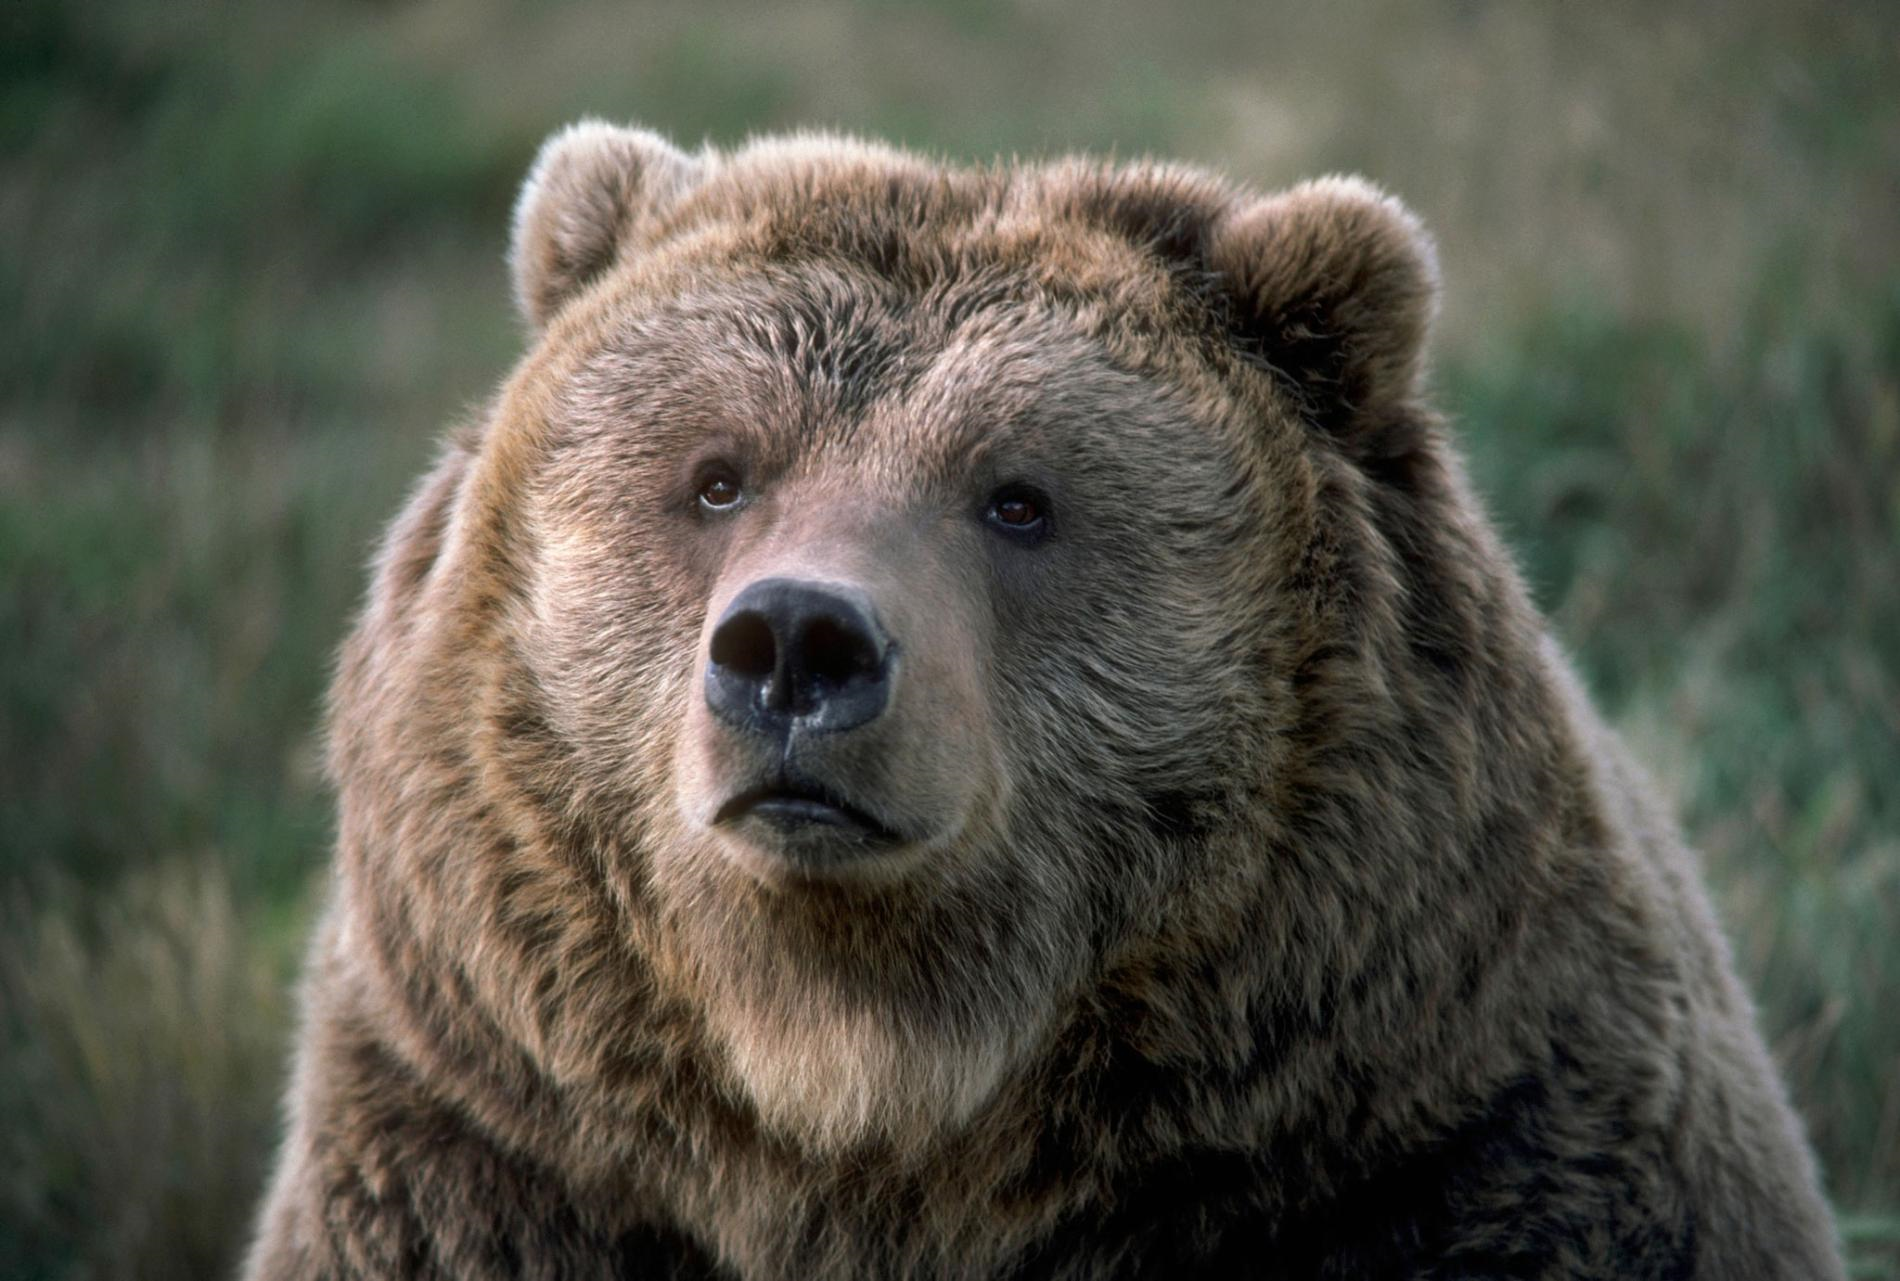

In [10]:
img_path = r'C:\Users\44788\Desktop\nature\bears\bear.png'
Image.open(img_path)

In [15]:
bear_img = load_img(img_path, target_size=(224,224))

In [29]:
def get_top_5_predictions(img):
    x = np.expand_dims(img_to_array(img), 0)
    x = preprocess_input(x)
    preds = decode_predictions(ResNet.predict(x), top=5)
    top_preds = pd.DataFrame(columns=['predicition', 'probability'], 
                            index=np.arange(5)+1)
    for i in range(5):
        top_preds.loc[i+1, 'predicition'] = preds[0][i][1]
        top_preds.loc[i+1, 'probability'] = preds[0][i][2]
    return top_preds

In [30]:
get_top_5_predictions(bear_img)

predicition  probability
1           brown_bear     0.999921
2  American_black_bear   5.2829e-05
3           sloth_bear  9.21886e-06
4             ice_bear  5.19031e-06
5                hyena  4.41555e-06

# Tensorflow hub modules

https://www.tensorflow.org/hub
repository of trained machine learning models ready for fine-tuning and deployable anywhere. Reuse trained models like BERT and Faster R-CNN with just a few lines of code.

In [31]:
import tensorflow_hub as hub

In [33]:
m = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v1_050_160/classification/4")
])
m.build([None, 160, 160, 3])

In [35]:
m.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              1343049   
Total params: 1,343,049
Trainable params: 0
Non-trainable params: 1,343,049
_________________________________________________________________


In [36]:
with open(r'C:\Users\44788\Desktop\OctaveML\imagenet.txt') as txt_file:
    categories = txt_file.read().splitlines()

In [39]:
def get_top_5_predictions(img):
    x = np.expand_dims(img_to_array(img), 0)/255
    preds = m.predict(x)
    top_preds = pd.DataFrame(columns=['prediction'], 
                            index=np.arange(5)+1)
    sorted_index = np.argsort(-preds[0])
    for i in range(5):
        ith_pred = categories[sorted_index[i]]
        top_preds.loc[i+1, 'prediction'] = ith_pred
    return top_preds

In [40]:
get_top_5_predictions(bear_img)

prediction
1           brown bear
2                bison
3              wallaby
4  American black bear
5                hyena

# Assignment 

In [51]:
sat_model = r'C:\Users\44788\Desktop\OctaveML\sat\EuroSatNet.h5'
x_data = np.load(r'C:\Users\44788\Desktop\OctaveML\sat\x_train_test.npy')/255
y_data = np.load(r'C:\Users\44788\Desktop\OctaveML\sat\y_train_test.npy')

In [53]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_targets, test_targets = train_test_split(x_data, y_data, test_size=0.1)

In [79]:
train_data.shape

(900, 64, 64, 3)

In [85]:
def get_new_model():
    model = Sequential([
        Conv2D(16, (3,3), activation='relu', padding='same', input_shape=(train_data[0].shape), name='conv_1'),
        Conv2D(8, (3,3), activation='relu', padding='same', name='conv_2'),
        MaxPooling2D((8,8), name='pool_1'),
        Flatten(name='flatten'),
        Dense(32, activation='relu', name='dense_1'),
        Dense(10, activation='softmax', name='dense_2')
    ])
    model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model 

In [86]:
scratch_model = get_new_model()

In [87]:
def get_test_accuracy(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x=x_test, y=y_test, verbose=0)
    print('accuracy: {acc:0.3f}'.format(acc=test_acc))

In [88]:
get_test_accuracy(scratch_model, test_data, test_targets)

accuracy: 0.110


In [89]:
scratch_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
conv_2 (Conv2D)              (None, 64, 64, 8)         1160      
_________________________________________________________________
pool_1 (MaxPooling2D)        (None, 8, 8, 8)           0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                16416     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 18,354
Trainable params: 18,354
Non-trainable params: 0
__________________________________________________

In [74]:
def get_checkpoint_every_epoch():
    path = 'checkpoints_every_epoch/checkpoint{epoch:02d}'
    checkpoint = ModelCheckpoint(path,
                                save_weights_only=True, save_fred='epoch')
    return checkpoint


def get_checkpoint_best_only():
    checkpoint = ModelCheckpoint('checkpoints_best_only/checkpoint',
                                save_weights_only=True, monitor='val_acc',
                                save_best_only=True,
                                mode='max') 
    return checkpoint

In [92]:
def get_early_stopping():
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=3)
    return early_stopping

In [93]:
scratch_model.fit(train_data, train_targets, epochs=50, validation_data=(test_data, test_targets), callbacks=[get_early_stopping()])

Epoch 1/50
29/29 [==============================] - 1s 22ms/step - loss: 0.4103 - accuracy: 0.8589 - val_loss: 1.3196 - val_accuracy: 0.6100
Epoch 2/50
29/29 [==============================] - 0s 9ms/step - loss: 0.6219 - accuracy: 0.7900 - val_loss: 1.0788 - val_accuracy: 0.6200
Epoch 3/50
29/29 [==============================] - 0s 9ms/step - loss: 0.4141 - accuracy: 0.8744 - val_loss: 1.0320 - val_accuracy: 0.6300
Epoch 4/50
29/29 [==============================] - 0s 9ms/step - loss: 0.3877 - accuracy: 0.8922 - val_loss: 0.9643 - val_accuracy: 0.6700
Epoch 5/50
29/29 [==============================] - 0s 9ms/step - loss: 0.3618 - accuracy: 0.8856 - val_loss: 1.0471 - val_accuracy: 0.6400
Epoch 6/50
29/29 [==============================] - 0s 9ms/step - loss: 0.3754 - accuracy: 0.8778 - val_loss: 1.1067 - val_accuracy: 0.5900
Epoch 7/50
29/29 [==============================] - 0s 8ms/step - loss: 0.3698 - accuracy: 0.8844 - val_loss: 1.0689 - val_accuracy: 0.6300


In [94]:
def get_model_last_epoch(model):
    model = get_new_model(x_train[0].shape)
    model.load_weights(tf.train.latest_checkpoint('checkpoints_every_epoch'))
    return model   
    
def get_model_best_epoch(model):
    model = get_new_model(x_train[0].shape)
    model.load_weights('checkpoints_best_only/checkpoint')
    return model 

In [95]:
def get_model_eurosatnet():
    model = load_model(sat_model)
    return model 

In [97]:
model_eurosatnet = get_model_eurosatnet()
model_eurosatnet.summary()
get_test_accuracy(model_eurosatnet, test_data, test_targets)

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
conv_2 (Conv2D)              (None, 64, 64, 16)        6416      
_________________________________________________________________
pool_1 (MaxPooling2D)        (None, 32, 32, 16)        0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 32, 32, 16)        2320      
_________________________________________________________________
conv_4 (Conv2D)              (None, 32, 32, 16)        6416      
_________________________________________________________________
pool_2 (MaxPooling2D)        (None, 16, 16, 16)        0         
_________________________________________________________________
conv_5 (Conv2D)              (None, 16, 16, 16)      